## Stereo Depth Estimation
Ref - https://www.learnopencv.com/introduction-to-epipolar-geometry-and-stereo-vision/

### Load package

In [7]:
import cv2   # '4.2.0'
import matplotlib.pyplot as plt
import numpy as np
import os

### Parameter

In [11]:
# Data
DATASET_FPATH = 'D:\\Dataset\\stereo_dataset_2005'
DATA_SUBFOLDER = 'Books'
L_IMG_FPATH = os.path.join(DATASET_FPATH, DATA_SUBFOLDER, 'view1.png')
R_IMG_FPATH = os.path.join(DATASET_FPATH, DATA_SUBFOLDER, 'view5.png')

In [31]:
# StereoSGBM algorithm
DISP_MIN = 0         # Minimum possible disparity value. Normally, it is zero.
DISP_NUM = 64        # Maximum disparity minus minimum disparity.
BLK_SIZE = 8         # Matched block size. It must be an odd number >=1. Normally within 3 ~ 11.
DISP_MAX_DIFF = 1    # Maximum allowed difference (in integer pixel units) in the left-right disparity check.
                     # Set it to a non-positive value to disable the check.
UNIQUE_RATIO = 10    # Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
                     # Normally, a value within the 5-15 range is good enough.
SPECKLE_WIN_SIZE = 10# Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
                     # Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
SPECKLE_RANGE = 8    # Maximum disparity variation within each connected component.
                     # If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
                     # Normally, 1 or 2 is good enough.

### Load stereo data

In [6]:
# Load image data
img_l = cv2.imread(L_IMG_FPATH)
img_r = cv2.imread(R_IMG_FPATH)

### Compute disparity

In [32]:
# Init StereoSGBM
stereo = cv2.StereoSGBM_create(minDisparity=DISP_MIN, numDisparities=DISP_NUM, blockSize=BLK_SIZE,
                               disp12MaxDiff=DISP_MAX_DIFF, uniquenessRatio=UNIQUE_RATIO,
                               speckleWindowSize=SPECKLE_WIN_SIZE, speckleRange=SPECKLE_RANGE)

In [33]:
# Compute disparity
disp = stereo.compute(img_l, img_r)

In [34]:
# Normalize
disp_n = cv2.normalize(disp.astype(np.float32), 0, 255, cv2.NORM_MINMAX)
disp_n = (disp_n * 255).astype(np.uint8)

### Visualize result

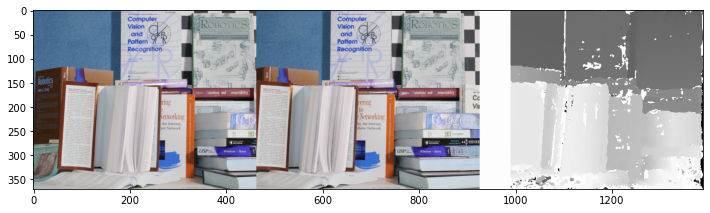

In [35]:
fig = plt.figure(figsize=(12, 4))
plt.imshow(np.concatenate([img_l, img_r, cv2.cvtColor(disp_n, cv2.COLOR_GRAY2BGR)], axis=1))